In [1]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name= "mnist_784", version = 'active')


In [2]:
import scipy.ndimage
data_features = data["data"]
data_labels = data["target"]
#split our data
data_features_train, data_features_test , data_labels_train, data_labels_test = data_features[:60000], data_features[60000:], data_labels[:60000],  data_labels[60000:]

1


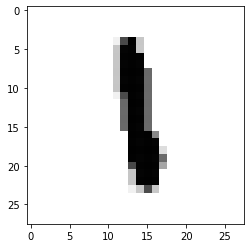

In [3]:
from matplotlib import pyplot as plt
some_number = data_features[200]
some_number_label = data_labels[200]
some_number_img = some_number.reshape(28,28)
plt.imshow(some_number_img, cmap='Greys')
print(some_number_label)


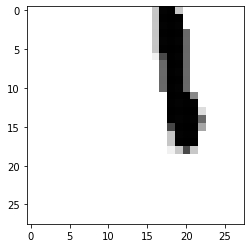

In [4]:
from scipy.ndimage.interpolation import shift
import numpy as np

some_number_imgh_shifted = shift(some_number_img, [-5,5], cval=0)
plt.imshow(some_number_imgh_shifted, cmap='Greys')

In [5]:

#function for shift the image and return the new img
def shift_image(number, dx,dy):
  
  img =  number.reshape(28,28)
  img_shifted = shift(img, [dy,dx])
  return img_shifted.reshape([-1])

In [ ]:

#ndarrays must be LISTS in order to use append method
extended_data_features_train = [image for image in data_features_train]
extended_data_labels_train = [label for label in data_labels_train] 
iter = 0
for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
  for number, label in zip(extended_data_features_train, extended_data_labels_train):
    extended_data_features_train.append(shift_image(number, dx, dy))
    extended_data_labels_train.append(label)



   

In [ ]:
#return our list into array
extended_data_features_train = np.array(extended_data_features_train)
extended_data_labels_train = np.array(extended_data_labels_train)
#shuffle our extended train dataset
shuffle_idx = np.random.permutation(len(extended_data_features_train)) #use the same shuffled idx fot both arrays
extended_data_features_train = extended_data_features_train[shuffle_idx]
extended_data_labels_train = extended_data_labels[shuffle_idx]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(extended_data_features_train, extended_data_labels_train)


In [ ]:
from sklearn.metrics import accuracy_score
y_predict = kn_classifier.predict(data_features_test)
accuracy_score(y_predict, data_labels_test)